In [17]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt


In [18]:
# Procedure for processing doppler data to extract velocity information
# 1. Spectrogram
# 2. Filter
# 3. Get Doppler
# 4. Discriminator (discriminate between noise and signal)
# 5. Plot results

In [73]:
def plot_spectrogram(wav, fs, title, nfft_exp):
  ''' Makes plots

  wav: signal
  fs: sampling frequency
  '''
  func, t, Sxx = scipy.signal.spectrogram(wav, fs, nperseg=2048, noverlap=1024, nfft=2**nfft_exp)
  Sxx = 10 * np.log10(Sxx)
  Sxx = Sxx[:300, :]
  func = t[:300]
  print(np.shape(Sxx), np.shape(t), np.shape(func))
  plt.figure()
  plt.pcolormesh(t, func, Sxx)
  cbar = plt.colorbar()
  plt.title(f'{title}')
  cbar.set_label('Magnitude (dB)')
  plt.ylabel('Doppler Frequency (Hz)')
  plt.xlabel('Time (s)')
  plt.show()
  return plt, (func, t, Sxx)

Processing doppler_data\Test_Trial_1.wav
(300, 429) (429,) (300,)


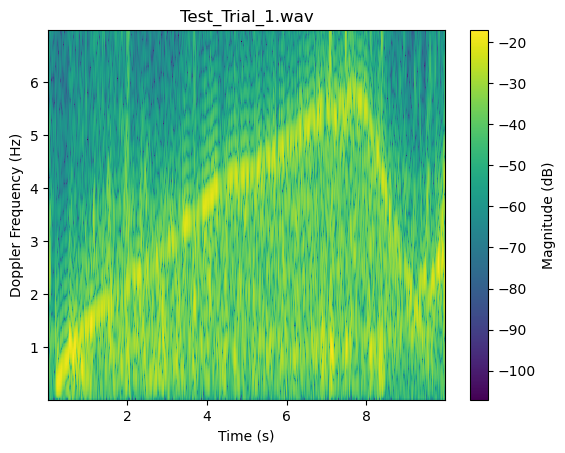

Processing doppler_data\Test_Trial_2.wav
(300, 429) (429,) (300,)


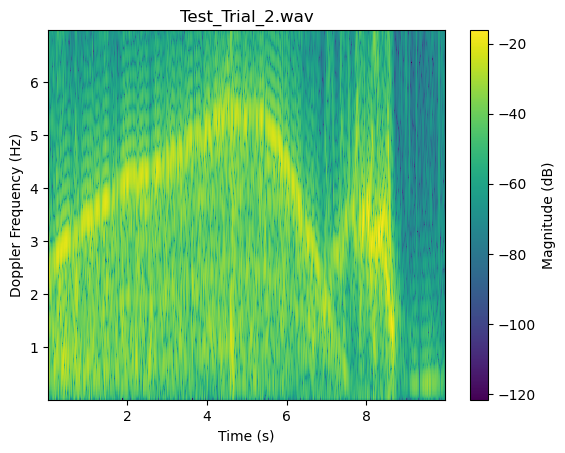

Processing doppler_data\Test_Trial_3.wav
(300, 429) (429,) (300,)


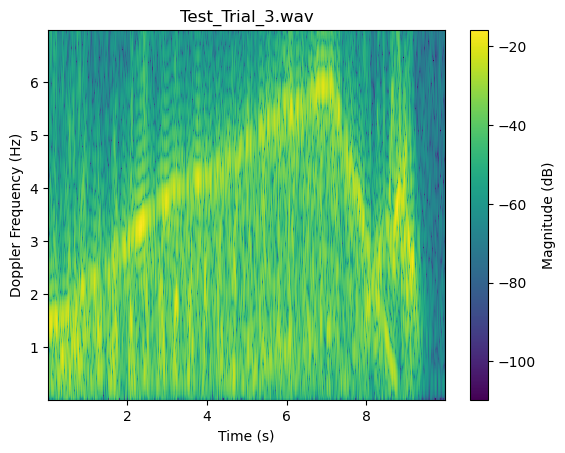

Processing doppler_data\Test_Trial_4.wav
(300, 429) (429,) (300,)


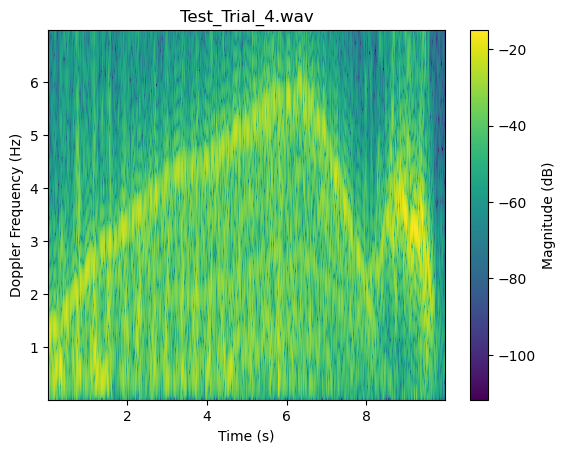

Processing doppler_data\Test_Trial_5.wav
(300, 429) (429,) (300,)


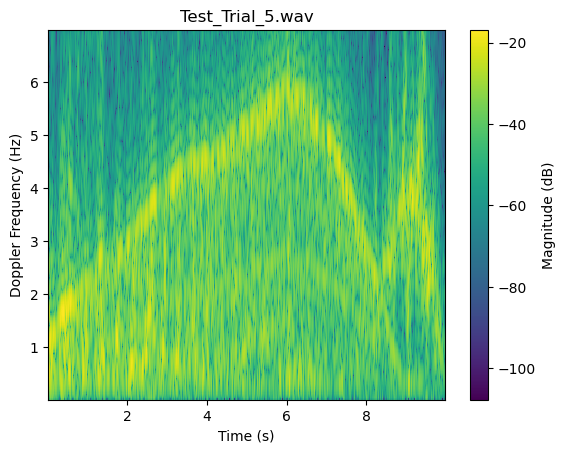

Processing doppler_data\Test_Trial_6.wav
(300, 429) (429,) (300,)


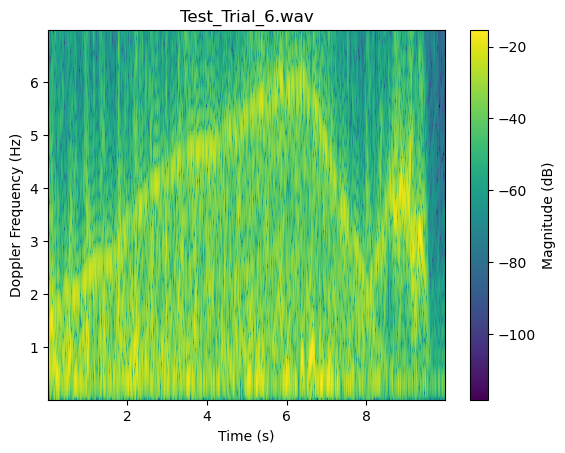

Processing doppler_data\Test_Trial_7.wav


C:\Users\vsmar\AppData\Local\Temp\ipykernel_32924\1785310052.py:8: RuntimeWarning: divide by zero encountered in log10
  Sxx = 10 * np.log10(Sxx)


(300, 429) (429,) (300,)


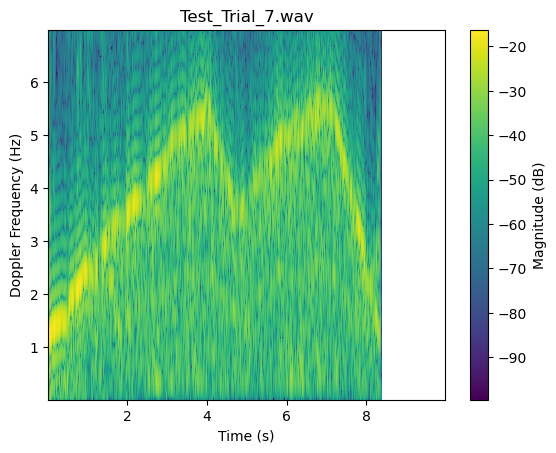

Processing doppler_data\Test_Trial_8.wav
(300, 429) (429,) (300,)


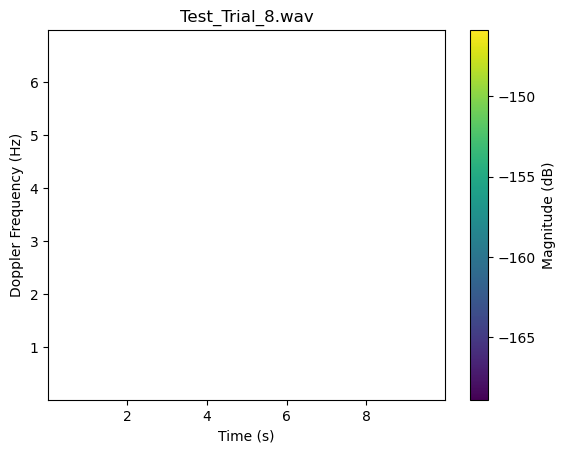

Processing doppler_data\Test_Trial_9.wav
(300, 429) (429,) (300,)


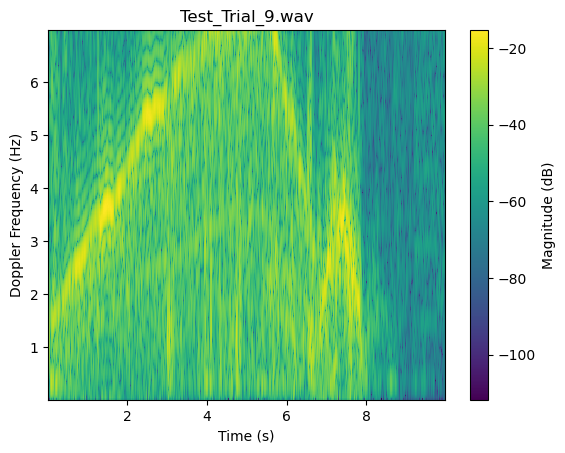

In [77]:
wav_directory = "doppler_data"

for run in range(1, 10):
  wav_name = f'Test_Trial_{run}.wav'
  wav_file = os.path.join(wav_directory, wav_name)
  if os.path.exists(wav_file):
    print(f"Processing {wav_file}")
    fs, data = scipy.io.wavfile.read(wav_file)
    
    # plot the spectrogram
    plot_spectrogram(data, fs, title=wav_name, nfft_exp=15)

  else:
    print(f"File {wav_file} does not exist.")


In [ ]:
# def plot_spectrogram(wav, fs, title, nfft_exp):
#   ''' Makes plots

#   wav: signal
#   fs: sampling frequency
#   '''
#   nperseg=2048

#   window = np.hamming(nperseg)

#   func, t, Sxx = scipy.signal.spectrogram(wav, fs, window=window, nperseg=nperseg, noverlap=nperseg//2, 
#                                           nfft=2**nfft_exp, scaling='spectrum', mode='magnitude')
#   Sxx = 10 * np.log10(Sxx)
#   Sxx = Sxx[:300, :]
#   func = t[:300]
#   print(np.shape(Sxx), np.shape(t), np.shape(func))
#   plt.figure()
#   plt.pcolormesh(t, func, Sxx)
#   cbar = plt.colorbar()
#   plt.title(f'{title}')
#   cbar.set_label('Magnitude (dB)')
#   plt.ylabel('Doppler Frequency (Hz)')
#   plt.xlabel('Time (s)')
#   plt.show()
#   return plt